In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv(r'/content/up2restaurant.csv', encoding='unicode_escape')
dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Phone No
0,536365,NORTH-INDIAN FOOD,6,2010-12-1 8:26,2.55,17850.0,United Kingdom,9.108018e+09
1,536365,SOUTH-INDIAN FOOD,6,2010-12-1 8:26,3.39,17850.0,United Kingdom,9.108018e+09
2,536365,PASTA,8,2010-12-1 8:26,2.75,17850.0,United Kingdom,9.108018e+09
3,536365,NORTH-INDIAN FOOD,6,2010-12-1 8:26,3.39,17850.0,United Kingdom,9.108018e+09
4,536365,NON-VEG-NORTH,6,2010-12-1 8:26,3.39,17850.0,United Kingdom,9.108018e+09


In [ ]:
dataset.shape

(100243, 8)

In [ ]:
# Detailing the Country distribution and customerid
country_data = dataset[['Country','CustomerID']].drop_duplicates()
country_data.groupby(['Country']).agg({'CustomerID' : 'count'}).sort_values('CustomerID',ascending = False).reset_index().rename(columns = {'CustomerID':'CustomerID Count'})

,Country,CustomerID Count
0,United Kingdom,1503
1,Germany,42
2,France,36
3,Spain,12
4,Belgium,9
5,Australia,8
6,Portugal,7
7,Italy,7
8,Cyprus,5
9,Netherlands,4


In [ ]:
dataset = dataset[dataset['Country'] == 'United Kingdom'].reset_index(drop = True)

dataset.shape

(92587, 8)

In [ ]:
dataset.isna().sum()
dataset= dataset[pd.notnull(dataset['CustomerID'])]

#Checking the description of the data
dataset.describe()

#cityData=dataset[['Country','CustomerID']].drop_duplicates()
#cityData.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Quantity,UnitPrice,CustomerID,Phone No
count,57858.000000,57858.000000,57858.000000,5.785800e+04
mean,10.912147,3.176007,15642.680183,9.108016e+09
std,440.897582,6.791130,1627.562222,1.627562e+03
min,-74215.000000,0.000000,12346.000000,9.108012e+09
25%,2.000000,1.250000,14320.000000,9.108014e+09
50%,4.000000,1.950000,15574.000000,9.108016e+09
75%,12.000000,3.750000,17191.000000,9.108017e+09
max,74215.000000,856.480000,18283.000000,9.108018e+09


In [ ]:

dataset=dataset.query("Country=='United Kingdom'").reset_index(drop =True)
dataset.isnull().sum(axis=0)

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Phone No       0
dtype: int64

In [ ]:
#Remove  missing values from Customer ID column, can ignore missing values in description column

dataset=dataset[pd.notnull(dataset['CustomerID'])]
dataset = dataset.query("Quantity > 0")
dataset.shape

(56363, 8)

In [ ]:
#dataset.UnitPrice.min()

In [ ]:
dataset=dataset[(dataset['Quantity']>0)]
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
#print(dataset['InvoiceDate']) 
dataset['TotalAmount']= dataset['Quantity'] * dataset['UnitPrice']
#print(dataset['TotalAmount']) 
dataset.shape

(56363, 9)

In [ ]:
dataset.tail()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Phone No,TotalAmount
57853,544810,BREVREAGES,12,2011-02-23 15:53:00,1.25,17675.0,United Kingdom,9.108018e+09,15.00
57854,544810,PIZZA,64,2011-02-23 15:53:00,1.69,17675.0,United Kingdom,9.108018e+09,108.16
57855,544810,NORTH-INDIAN FOOD,6,2011-02-23 15:53:00,7.95,17675.0,United Kingdom,9.108018e+09,47.70
57856,544810,SOUTH-INDIAN FOOD,4,2011-02-23 15:53:00,8.50,17675.0,United Kingdom,9.108018e+09,34.00
57857,544810,CHINESE,8,2011-02-23 15:53:00,3.95,17675.0,United Kingdom,9.108018e+09,31.60


# RFM Modelling

## What Is Recency, Frequency, Monetary Value (RFM)?
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:


Recency: How recently a customer has made a purchase
Frequency: How often a customer makes a purchase
Monetary Value: How much money a customer spends on purchases

In [ ]:
import datetime as  dt

dataset['InvoiceDate']=pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDate'].max()

Timestamp('2011-02-23 15:53:00')

In [ ]:
#recency= latest date - last Inovice Data
#Frequency=count of invoice no.of  transcation(s)
#Monetary =sum of Total
#Amount for each customer

import datetime as  dt

#set Latest date 2011-12-10 as last invoice date was 2011-12-09.this is to caluculate the number of days from recent purchase

latest_Date=dt.datetime(2011,12,10)

ld = pd.to_datetime(latest_Date)

In [ ]:
RFMScores =dataset.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_Date -x.max()).days,
                                                                        'InvoiceNo':lambda x: len(x),
                                                                       'TotalAmount':lambda x: x.sum()})


#Convert Invoice Date into type int
RFMScores['InvoiceDate']= RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)


#RENAME COLUMN NAMES TO RECENCY, FREQUENCY, AND MONETARY

RFMScores.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalAmount':'Monetary'}, inplace =True)


RFMScores.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,323,20,1009.31
2,12748.0,290,711,4678.65
3,12820.0,326,11,170.46
4,12823.0,289,2,535.50
...,...,...,...,...
1439,18257.0,290,16,363.80
1440,18259.0,366,7,376.30
1441,18260.0,334,37,787.77
1442,18269.0,366,7,168.60


In [ ]:
#DESCRIPTIVE STATISTICS
RFMScores.Recency.describe()

count    1444.000000
mean      326.328947
std        27.869794
min       289.000000
25%       302.000000
50%       318.000000
75%       358.000000
max       373.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


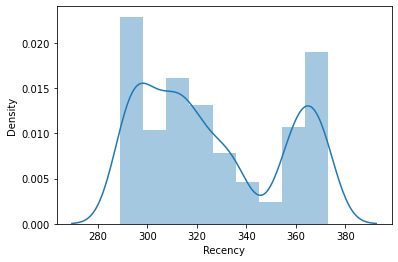

In [ ]:
#RECENCY DISTRIBUTION PLOT
import seaborn as sns

x=RFMScores['Recency']
ax= sns.distplot(x)


In [ ]:
RFMScores.Frequency.describe()


count    1444.000000
mean       39.032548
std        55.272835
min         1.000000
25%        11.000000
50%        23.000000
75%        49.000000
max       711.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


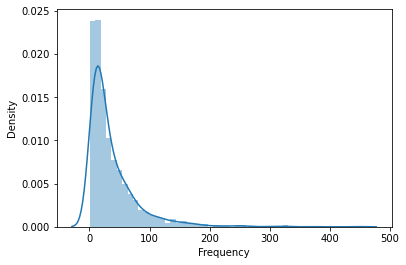

In [ ]:
x=RFMScores.query('Frequency < 500')['Frequency']
ax= sns.distplot(x)


In [ ]:
RFMScores.Monetary.describe()

count     1444.000000
mean       857.241025
std       2790.180964
min          0.850000
25%        205.017500
50%        376.505000
75%        762.032500
max      77183.600000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


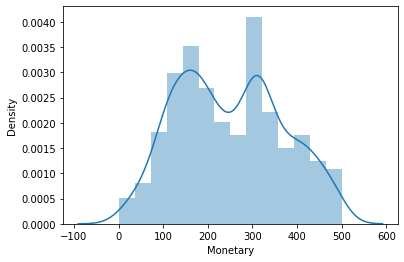

In [ ]:
x=RFMScores.query('Monetary < 500')['Monetary']
ax= sns.distplot(x)


In [ ]:
#Split into four Segments using quantiles
quantiles =RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles =quantiles.to_dict()
quantiles

{'Cluster': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'F': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'Frequency': {0.25: 11.0, 0.5: 23.0, 0.75: 49.0},
 'M': {0.25: 1.75, 0.5: 2.5, 0.75: 3.25},
 'Monetary': {0.25: 205.0175, 0.5: 376.50499999999994, 0.75: 762.0325},
 'R': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'RFMScore': {0.25: 5.0, 0.5: 8.0, 0.75: 10.0},
 'Recency': {0.25: 302.0, 0.5: 318.0, 0.75: 358.0}}

In [ ]:
#FUNCTIONS TO CREATE R, F AND M SEGMENTS
#imp
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
def FnMScoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [ ]:
#calculate ADD R, F AND M SEGMENT VALUE COLUMNS IN THE EXISTING DATASET TO SHOW R, F, AND M SEGMENT VALUES

RFMScores['R']= RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F']= RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M']= RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))

RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8,REGULAR,2,green
12747.0,323,20,1009.31,3,3,1,331,7,REGULAR,0,green
12748.0,290,711,4678.65,1,1,1,111,3,HIGHLY VISITED,1,green
12820.0,326,11,170.46,3,4,4,344,11,NEW VISITORS,0,black
12823.0,289,2,535.50,1,4,2,142,7,REGULAR,0,black


In [ ]:
#calculate and Add RFM group value column showing combined concatenated score of RFM
RFMScores['RFMGroup']=RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)


#Calculate and Add RFMScore value column showing total sum of RFM Group values

RFMScores['RFMScore'] =RFMScores[['R' ,'F', 'M']].sum(axis = 1)
RFMScores.reset_index()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,12346.0,325,1,77183.60,3,4,1,341,8,REGULAR,2,green
1,12747.0,323,20,1009.31,3,3,1,331,7,REGULAR,0,green
2,12748.0,290,711,4678.65,1,1,1,111,3,HIGHLY VISITED,1,green
3,12820.0,326,11,170.46,3,4,4,344,11,NEW VISITORS,0,black
4,12823.0,289,2,535.50,1,4,2,142,7,REGULAR,0,black
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,18257.0,290,16,363.80,1,3,3,133,7,REGULAR,0,black
1440,18259.0,366,7,376.30,4,4,3,443,11,NEW VISITORS,0,blue
1441,18260.0,334,37,787.77,3,2,1,321,6,REGULAR,0,green
1442,18269.0,366,7,168.60,4,4,4,444,12,NEW VISITORS,0,blue


In [ ]:
#assign loyalty level to each customer

loyaltyLevel=['HIGHLY VISITED', 'REGULAR', 'OCCASIONALLY VISITED', 'NEW VISITORS']
scoreCuts= pd.qcut(RFMScores.RFMScore, q=4, labels=loyaltyLevel,duplicates="drop")
RFMScores['RFM_Loyalty_Level']=scoreCuts.values

RFMScores.reset_index()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,12346.0,325,1,77183.60,3,4,1,341,8,REGULAR,2,green
1,12747.0,323,20,1009.31,3,3,1,331,7,REGULAR,0,green
2,12748.0,290,711,4678.65,1,1,1,111,3,HIGHLY VISITED,1,green
3,12820.0,326,11,170.46,3,4,4,344,11,NEW VISITORS,0,black
4,12823.0,289,2,535.50,1,4,2,142,7,REGULAR,0,black
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,18257.0,290,16,363.80,1,3,3,133,7,REGULAR,0,black
1440,18259.0,366,7,376.30,4,4,3,443,11,NEW VISITORS,0,blue
1441,18260.0,334,37,787.77,3,2,1,321,6,REGULAR,0,green
1442,18269.0,366,7,168.60,4,4,4,444,12,NEW VISITORS,0,blue


In [ ]:
#Validate the data for RFMGroup =111

RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,15061.0,301,170,22671.33,1,1,1,111,3,HIGHLY VISITED,1,green
1,16029.0,291,57,19452.27,1,1,1,111,3,HIGHLY VISITED,1,green
2,17511.0,290,214,18356.86,1,1,1,111,3,HIGHLY VISITED,1,green
3,13089.0,289,447,15557.62,1,1,1,111,3,HIGHLY VISITED,1,green
4,15311.0,289,696,12877.85,1,1,1,111,3,HIGHLY VISITED,1,green
5,13694.0,289,132,10770.16,1,1,1,111,3,HIGHLY VISITED,1,green
6,13798.0,292,91,10468.68,1,1,1,111,3,HIGHLY VISITED,1,green
7,14298.0,295,324,9832.64,1,1,1,111,3,HIGHLY VISITED,1,green
8,16684.0,296,58,9811.98,1,1,1,111,3,HIGHLY VISITED,1,green
9,14680.0,294,95,8284.12,1,1,1,111,3,HIGHLY VISITED,1,green


### Recency Vs Frequency

In [ ]:
!pip install -q plotly==4.2.1
!pip install chart_studio

     |████████████████████████████████| 7.2MB 3.8MB/s 
     |████████████████████████████████| 71kB 2.6MB/s 


In [ ]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000 ")

plot_data =[ gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'NEW VISITORS'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='NEW VISITORS'")['Frequency'],
                          mode='markers',
                          name='NEW VISITORS' ,
                          marker =dict(size =7,
                                      line=dict(width=1),
                                      color='blue',
                                      opacity =0.8
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'OCCASIONALLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='OCCASIONALLY VISITED'")['Frequency'],
                          mode='markers',
                          name='OCCASIONALLY VISITED' ,
                          marker =dict(size =9,
                                      line=dict(width=1),
                                      color='green',
                                      opacity =0.5
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'REGULAR'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='REGULAR'")['Frequency'],
                          mode='markers',
                          name='REGULAR' ,
                          marker =dict(size =11,
                                      line=dict(width=1),
                                      color='red',
                                      opacity =0.9
                                      )
                         ),
            gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'HIGHLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='HIGHLY VISITED'")['Frequency'],
                          mode='markers',
                          name='HIGHLY VISITED' ,
                          marker =dict(size =13,
                                      line=dict(width=1),
                                      color='black',
                                      opacity =0.9
                                      )
                         ),
           ]

plot_layout =gobj.Layout(
    yaxis={'title':"Frequency"},
    xaxis={'title':'Recency'},
    title='Segments'
)

fig = gobj.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)


#### FREQUENCY VS MONETARY

In [ ]:
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000 ")

plot_data =[ gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'NEW VISITORS'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='NEW VISITORS'")['Monetary'],
                          mode='markers',
                          name='NEW VISITORS' ,
                          marker =dict(size =7,
                                      line=dict(width=1),
                                      color='blue',
                                      opacity =0.8
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'OCCASIONALLY VISITED'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='OCCASIONALLY VISITED'")['Monetary'],
                          mode='markers',
                          name='OCCASIONALLY VISITED' ,
                          marker =dict(size =9,
                                      line=dict(width=1),
                                      color='green',
                                      opacity =0.5
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'REGULAR'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='REGULAR'")['Monetary'],
                          mode='markers',
                          name='REGULAR' ,
                          marker =dict(size =11,
                                      line=dict(width=1),
                                      color='red',
                                      opacity =0.9
                                      )
                         ),
            gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'HIGHLY VISITED'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='HIGHLY VISITED'")['Monetary'],
                          mode='markers',
                          name='HIGHLY VISITED' ,
                          marker =dict(size =13,
                                      line=dict(width=1),
                                      color='black',
                                      opacity =0.9
                                      )
                         ),
           ]

plot_layout =gobj.Layout(
    yaxis={'title':"Monetary"},
    xaxis={'title':'Frequency'},
    title='Segments'
)

fig = gobj.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)


#### Recency vs Monetary

In [ ]:
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000 ")

plot_data =[ gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'NEW VISITORS'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='NEW VISITORS'")['Monetary'],
                          mode='markers',
                          name='NEW VISITORS' ,
                          marker =dict(size =7,
                                      line=dict(width=1),
                                      color='blue',
                                      opacity =0.8
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'OCCASIONALLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='OCCASIONALLY VISITED'")['Monetary'],
                          mode='markers',
                          name='OCCASIONALLY VISITED' ,
                          marker =dict(size =9,
                                      line=dict(width=1),
                                      color='green',
                                      opacity =0.5
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'REGULAR'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='REGULAR'")['Monetary'],
                          mode='markers',
                          name='REGULAR' ,
                          marker =dict(size =11,
                                      line=dict(width=1),
                                      color='red',
                                      opacity =0.9
                                      )
                         ),
            gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'HIGHLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='HIGHLY VISITED'")['Monetary'],
                          mode='markers',
                          name='HIGHLY VISITED' ,
                          marker =dict(size =13,
                                      line=dict(width=1),
                                      color='black',
                                      opacity =0.9
                                      )
                         ),
           ]

plot_layout =gobj.Layout(
    yaxis={'title':"Monetary"},
    xaxis={'title':'Recency'},
    title='Segments'
)

fig = gobj.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

# K-Means Clustering

In [ ]:
#Handle negative and zero values so as to handle infinte nubers during log transformation
def handle_neg_n_zero(num):
    if num <=0:
        return 1
    else:
        return num
#handle_neg_n_zero function to Recency and Monetary columns

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]


#performing log transformation to bring data into normal or near normal distribution

Log_Tfd_data = RFMScores[['Recency' , 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


Log_Tfd_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12747.0,5.778,2.996,6.917
12748.0,5.670,6.567,8.451
12820.0,5.787,2.398,5.139
12823.0,5.666,0.693,6.283
...,...,...,...
18257.0,5.670,2.773,5.897
18259.0,5.903,1.946,5.930
18260.0,5.811,3.611,6.669


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



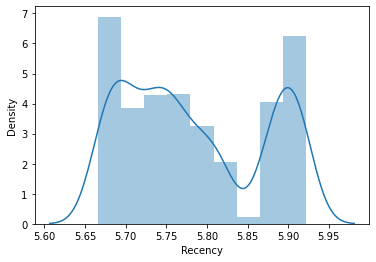

In [ ]:
#Data distribution after data normalization for Recency

Recency_Plot =Log_Tfd_data['Recency']
ax=sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



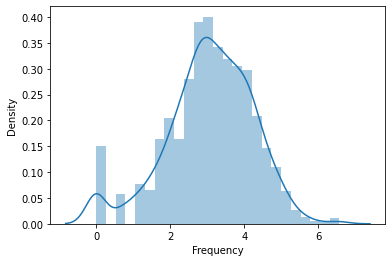

In [ ]:
#Data distribution after data normalization for Frequency

Frequency_Plot =Log_Tfd_data.query('Frequency < 1000')['Frequency']
ax=sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



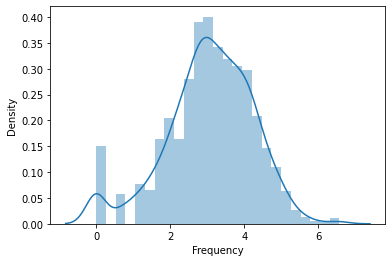

In [ ]:
#Data distribution after data normalization for Monetary

Frequency_Plot =Log_Tfd_data.query('Frequency < 1000')['Frequency']
ax=sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



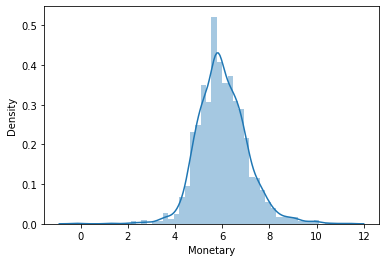

In [ ]:
#Data distribution after data normalization for Monetary

Monetary_Plot =Log_Tfd_data.query('Monetary < 1000')['Monetary']
ax=sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

# bring the data on same scale
scaleobj =StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_data)

Scaled_Data = pd.DataFrame(Scaled_Data, index= RFMScores.index, columns = Log_Tfd_data.columns)

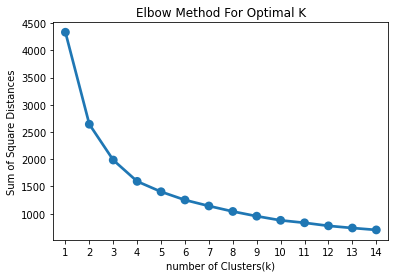

In [ ]:
from sklearn.cluster import KMeans

sumOfSqDist = {}
for k in range(1,15):
    km=KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km=km.fit(Scaled_Data)
    sumOfSqDist[k] = km.inertia_
    
    
#plot the graph for sum of square distance values and Number of Clusters
sns.pointplot(x= list(sumOfSqDist.keys()),y= list(sumOfSqDist.values()))
plt.xlabel('number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [ ]:
#perform K-mean clustering or build the K-means clustering model

KMean_clust = KMeans(n_clusters= 4, init='k-means++', max_iter =1000)
KMean_clust.fit(Scaled_Data)
RFMScores['Cluster']= KMean_clust.labels_
RFMScores.tail()
print(RFMScores['Cluster'])

CustomerID
12346.0    1
12747.0    1
12748.0    1
12820.0    3
12823.0    3
          ..
18257.0    3
18259.0    2
18260.0    1
18269.0    2
18283.0    3
Name: Cluster, Length: 1444, dtype: int32


<Figure size 504x504 with 0 Axes>

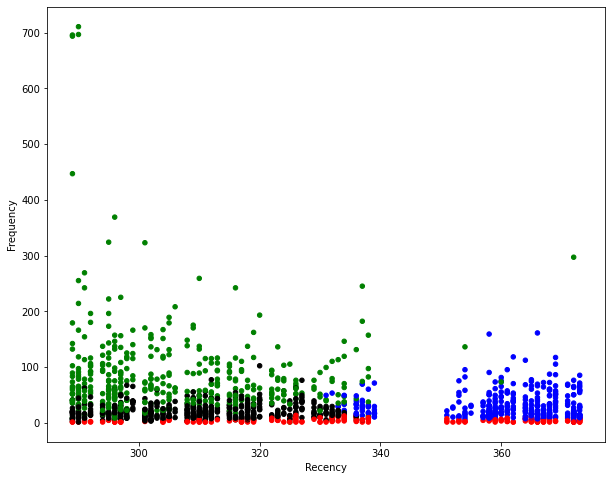

In [ ]:
from  matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter plot frequency VS Recency
colors=["red", "green", "blue","black"]
RFMScores['Color']= RFMScores['Cluster'].map(lambda p: colors[p])
ax=RFMScores.plot(kind="scatter",
                 x="Recency",
                 y="Frequency",
                 figsize=(10,8),
                 c = RFMScores['Color'])



In [ ]:
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8,REGULAR,1,green
12747.0,323,20,1009.31,3,3,1,331,7,REGULAR,1,green
12748.0,290,711,4678.65,1,1,1,111,3,HIGHLY VISITED,1,green
12820.0,326,11,170.46,3,4,4,344,11,NEW VISITORS,3,black
12823.0,289,2,535.50,1,4,2,142,7,REGULAR,3,black


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



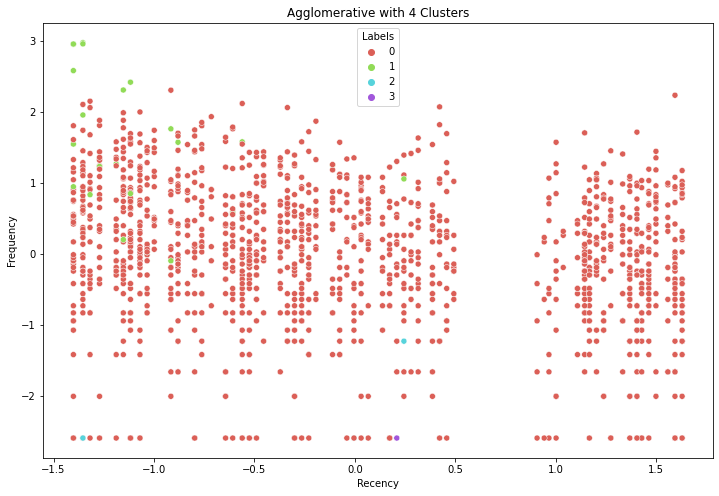

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(Scaled_Data)

Scaled_Data['Labels'] = agglom.labels_
RFMScores['Cluster']= agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(Scaled_Data['Recency'], Scaled_Data['Frequency'], hue=Scaled_Data['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('Agglomerative with 4 Clusters')
plt.show()


In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,OCCASIONALLY VISITED,0,blue
12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,2,green
12748.0,1,4572,33625.62,1,1,1,111,3,HIGHLY VISITED,1,green
12749.0,3,199,4090.88,1,1,1,111,3,HIGHLY VISITED,2,green
12820.0,3,59,942.34,1,2,2,122,5,HIGHLY VISITED,2,green


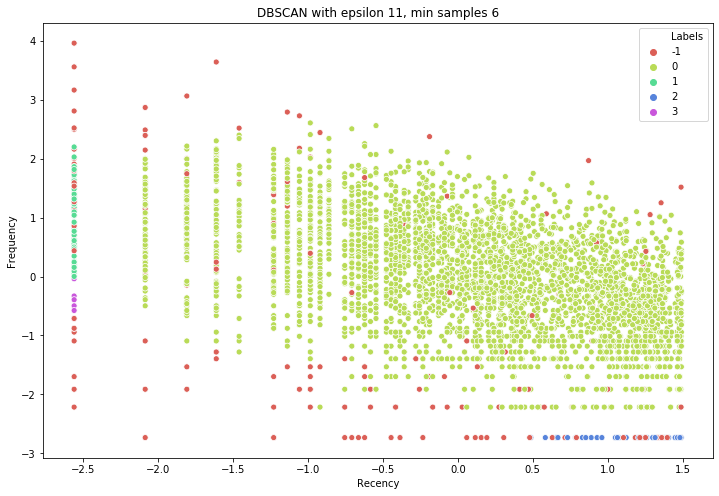

In [ ]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.4, min_samples=6).fit(Scaled_Data)

Scaled_Data['Labels'] = db.labels_
RFMScores['Cluster']= db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(Scaled_Data['Recency'], Scaled_Data['Frequency'], hue=Scaled_Data['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [ ]:
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,OCCASIONALLY VISITED,-1,blue
12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,0,green
12748.0,1,4572,33625.62,1,1,1,111,3,HIGHLY VISITED,-1,green
12749.0,3,199,4090.88,1,1,1,111,3,HIGHLY VISITED,0,green
12820.0,3,59,942.34,1,2,2,122,5,HIGHLY VISITED,0,green


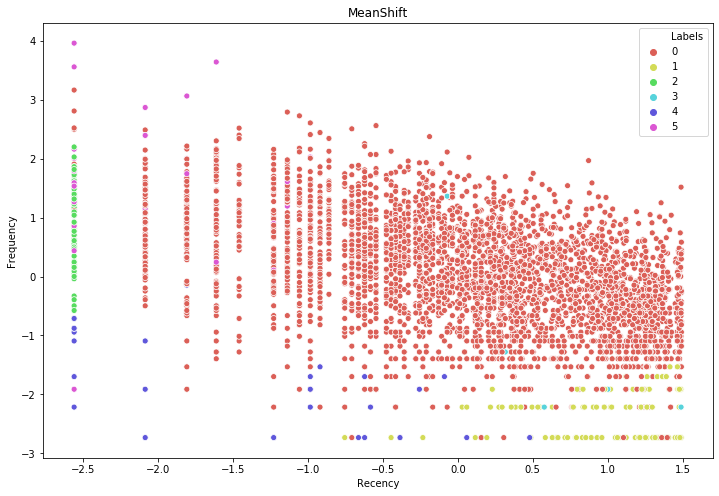

In [ ]:

from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Scaled_Data, quantile=0.4)
ms = MeanShift(bandwidth).fit(Scaled_Data)
RFMScores['Cluster']= db.labels_
Scaled_Data['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(Scaled_Data['Recency'], Scaled_Data['Frequency'], hue=Scaled_Data['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,OCCASIONALLY VISITED,-1,blue
12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,0,green
12748.0,1,4572,33625.62,1,1,1,111,3,HIGHLY VISITED,-1,green
12749.0,3,199,4090.88,1,1,1,111,3,HIGHLY VISITED,0,green
12820.0,3,59,942.34,1,2,2,122,5,HIGHLY VISITED,0,green


In [ ]:
#perform K-mean clustering or build the K-means clustering model

KMean_clust = KMeans(n_clusters= 4, init='k-means++', max_iter =1000)
KMean_clust.fit(Scaled_Data)
RFMScores['Cluster']= KMean_clust.labels_
RFMScores.tail()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
18280.0,277,10,180.60,4,4,4,444,12,NEW VISITORS,0,red
18281.0,180,7,80.82,4,4,4,444,12,NEW VISITORS,0,red
18282.0,7,12,178.05,1,4,4,144,9,OCCASIONALLY VISITED,2,black
18283.0,3,756,2094.88,1,1,1,111,3,HIGHLY VISITED,1,green
18287.0,42,70,1837.28,2,2,1,221,5,HIGHLY VISITED,2,blue


In [ ]:


modified = RFMScores

modified.tail()
type(dataset)



pandas.core.frame.DataFrame

In [ ]:
dataset.tail()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Phone No,TotalAmount
361584,581496,SWEET LASSI,6.0,2011-12-09 10:20:00,2.95,16558.0,United Kingdom,9.108017e+09,17.70
361585,581496,PANEER MAKHNI BIRYANI,12.0,2011-12-09 10:20:00,0.79,16558.0,United Kingdom,9.108017e+09,9.48
361586,581496,VEG BIRYANI,12.0,2011-12-09 10:20:00,0.79,16558.0,United Kingdom,9.108017e+09,9.48
361587,581496,SOUTH-INDIAN FOOD,48.0,2011-12-09 10:20:00,0.19,16558.0,United Kingdom,9.108017e+09,9.12
361588,581496,PANEER PAKODA,48.0,2011-12-09 10:20:00,0.19,16558.0,United Kingdom,9.108017e+09,9.12


In [ ]:
ds=dataset[["CustomerID", "Phone No "]]
merging=RFMScores
merging=merging.reset_index()
leftds=pd.DataFrame(merging)
rightds=pd.DataFrame(ds)
merged_inner = pd.merge(left=leftds, right=rightds, left_on='CustomerID', right_on='CustomerID')
merged_inner

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color,Phone No
0,12346.0,325,1,77183.60,4,4,1,441,9,OCCASIONALLY VISITED,3,blue,9.108012e+09
1,12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,1,green,9.108013e+09
2,12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,1,green,9.108013e+09
3,12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,1,green,9.108013e+09
4,12747.0,2,103,4196.01,1,1,1,111,3,HIGHLY VISITED,1,green,9.108013e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354055,18287.0,42,70,1837.28,2,2,1,221,5,HIGHLY VISITED,2,blue,9.108018e+09
354056,18287.0,42,70,1837.28,2,2,1,221,5,HIGHLY VISITED,2,blue,9.108018e+09
354057,18287.0,42,70,1837.28,2,2,1,221,5,HIGHLY VISITED,2,blue,9.108018e+09
354058,18287.0,42,70,1837.28,2,2,1,221,5,HIGHLY VISITED,2,blue,9.108018e+09


In [ ]:
md=merged_inner.drop(['CustomerID','Recency', 'Frequency','Monetary', 'R','F' ,'M','RFMGroup','RFMScore','Cluster','Color'], axis = 1)
md

,RFM_Loyalty_Level,Phone No
0,OCCASIONALLY VISITED,9.108012e+09
1,HIGHLY VISITED,9.108013e+09
2,HIGHLY VISITED,9.108013e+09
3,HIGHLY VISITED,9.108013e+09
4,HIGHLY VISITED,9.108013e+09
...,...,...
354055,HIGHLY VISITED,9.108018e+09
354056,HIGHLY VISITED,9.108018e+09
354057,HIGHLY VISITED,9.108018e+09
354058,HIGHLY VISITED,9.108018e+09


In [ ]:
st=md.loc[md['RFM_Loyalty_Level'] =='REGULAR']
#md.loc[md['RFM_Loyalty_Level'] =='OCCASIONALLY VISITED']
#md.loc[md['RFM_Loyalty_Level'] =='HIGHLY VISITED']
#md.loc[md['RFM_Loyalty_Level'] =='NEW VISITORS']

In [ ]:
print(st['Phone No '].astype(np.int64).unique())


[9108012822 9108012823 9108012827 ... 9108018261 9108018263 9108018265]
